In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from pycaret.regression import *

In [4]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [5]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9663,33302026.0000,5770.7905,0.8011,0.4683,0.4153
1,4503.7339,43746468.0000,6614.1113,0.7456,0.5633,0.4217
2,3880.5540,31795138.0000,5638.7178,0.5974,0.7645,0.4396
3,3747.6453,26805306.0000,5177.3843,0.7762,0.5015,0.5175
4,4471.0425,43410540.0000,6588.6675,0.6771,0.5224,0.3767
5,4182.7573,36166336.0000,6013.8452,0.7674,0.7416,0.4320
6,4081.1008,39192600.0000,6260.3994,0.7333,0.6434,0.4241
7,4928.1533,46415024.0000,6812.8574,0.7448,0.5887,0.4137
8,4609.3130,40370348.0000,6353.7666,0.7392,0.5686,0.5111
9,4665.8657,42596796.0000,6526.6221,0.7256,0.8131,0.4802


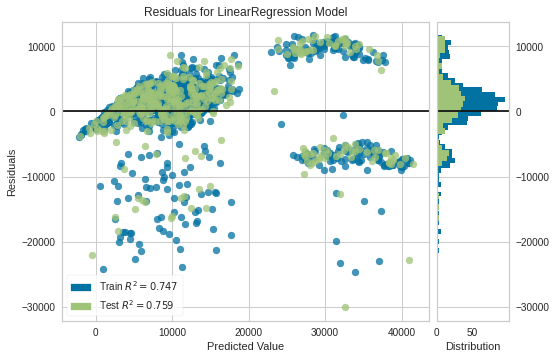

In [6]:
plot_model(lr)

In [7]:
# ------
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 57)"


In [13]:
s2[0].columns

AttributeError: 'Series' object has no attribute 'columns'

In [14]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3036.0017,21434604.0000,4629.7520,0.8720,0.3896,0.3137
1,3486.8730,32704514.0000,5718.7861,0.8098,0.4405,0.3345
2,3034.7493,23376022.0000,4834.8755,0.7040,0.5614,0.4033
3,2899.4170,19409006.0000,4405.5654,0.8379,0.4674,0.3893
4,3234.3159,27147442.0000,5210.3208,0.7981,0.4538,0.3108
5,3436.4272,26758090.0000,5172.8223,0.8279,0.4876,0.3124
6,2939.4304,25080744.0000,5008.0679,0.8293,0.3771,0.3151
7,3551.7937,30832640.0000,5552.7148,0.8305,0.4757,0.3165
8,3132.7195,22927440.0000,4788.2607,0.8519,0.3998,0.3320
9,3295.1787,29141348.0000,5398.2725,0.8123,0.5079,0.3647


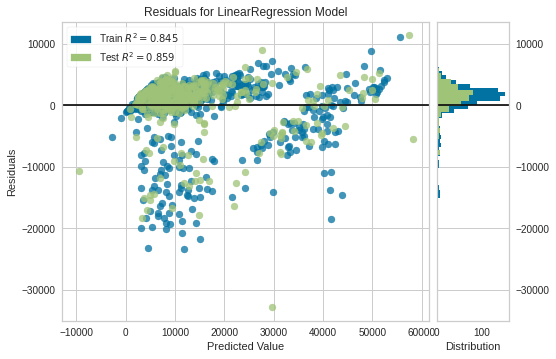

In [15]:
plot_model(lr)

In [16]:
save_model(lr, 'deployment_24052021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [17]:
deployment_24052021 = load_model('deployment_24052021')

Transformation Pipeline and Model Successfully Loaded


In [18]:
deployment_24052021

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             n_jobs=-1, random_state=123, subclass='binary',
                             target='charges',
               

In [19]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
